In [1]:
import numpy as np
import constrastive_explaination_prototype.src.maxi as maxi
import matplotlib.pyplot as plt
import tensorflow as tf

# Load imagenet data

In [3]:
from torchvision import datasets
import random
data_handler = datasets.ImageFolder(root=r'C:\Users\julia\Dokumente\GitHub\development\data\imagenetv2-matched-frequency-format-val')

In [4]:
def sample_random_images(data_handler, number, seed=None):
    images = []
    img_paths = data_handler.imgs.copy()
    if seed:
        random.seed(seed)
    for i in range(number):
        rand_idx = random.randint(0, len(img_paths))
        rand_img_path = img_paths.pop(rand_idx)[0]
        rand_img = data_handler.loader(rand_img_path)
        # resize
        rand_img = rand_img.resize((224, 224))
        # convert to np array
        images.append(np.array(rand_img))
    return np.array(images) / 255

In [5]:
x_test = sample_random_images(data_handler, 5, 5)

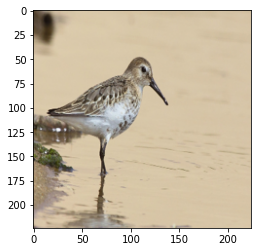

In [6]:
plt.imshow(x_test[3])

In [7]:
inputs = x_test[3].reshape(-1, 224, 224, 3)

# Load model

In [8]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [9]:
AE = None

# Load autoencoder (optional)

In [9]:
from autoencoder.autoencoder import Autoencoder

In [10]:
AE = Autoencoder(load_path="files/iamgenet_ae3.h5")

In [11]:
callable(AE)

True

# PN

In [10]:
loss_class = maxi.TF_CEMLoss
optimizer_class = maxi.SpectralAoExpGradOptimizer
gradient_class = maxi.TF_Gradient

loss_kwargs = {"mode": "PP", "c": 1, "gamma": 3, "K": 20, "AE": AE}
optimizer_kwargs = {"l1": 0.025, "l2": 0.000025, "eta": 1.0, "channels_first": False}
gradient_kwargs = {}

In [11]:
cem = maxi.ExplanationGenerator(
    loss=loss_class,
    optimizer=optimizer_class,
    gradient=gradient_class,
    num_iter=1000,
    loss_kwargs=loss_kwargs,
    optimizer_kwargs=optimizer_kwargs,
    gradient_kwargs=gradient_kwargs,
    save_freq=250,
    verbose=True,
)

In [12]:
results, _ = cem.run(image=inputs, inference_call=model)

iteration:      1 || overall_loss:    -0.0030 | attack_loss: -0.0030 | l1: 0.000000 | l2: 0.000000


C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\spectral_ao_exp_grad.py:76: RuntimeWarning: invalid value encountered in log
  np.log(abc) - np.log(np.log(abc)) + np.log(np.log(abc)) / np.log(abc),


iteration:     10 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     20 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     30 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     40 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     50 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     60 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     70 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     80 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:     90 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463
iteration:    100 || overall_loss:    59.0280 | attack_loss: -0.0031 | l1: 59.030592 | l2: 0.000463


C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\spectral_ao_exp_grad.py:65: RuntimeWarning: overflow encountered in exp
  _y = beta * np.exp(_z / alpha) - beta
C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\spectral_ao_exp_grad.py:76: RuntimeWarning: invalid value encountered in subtract
  np.log(abc) - np.log(np.log(abc)) + np.log(np.log(abc)) / np.log(abc),
C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\spectral_ao_exp_grad.py:76: RuntimeWarning: invalid value encountered in true_divide
  np.log(abc) - np.log(np.log(abc)) + np.log(np.log(abc)) / np.log(abc),


An exception occured: 
 SVD did not converge


Traceback (most recent call last):
  File "C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\explanation\explanation_generator.py", line 187, in run
    return self._explain(optimizer), meta_data
  File "C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\explanation\explanation_generator.py", line 150, in _explain
    opt_result: OptimizeResult = optimizer.step()
  File "C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\spectral_ao_exp_grad.py", line 146, in step
    return super().step(*args, **kwargs)
  File "C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\base_optimizer.py", line 71, in step
    y = self.alg.update() if self.call_count != 0 else self.x0
  File "C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi

NameError: name 'exit' is not defined

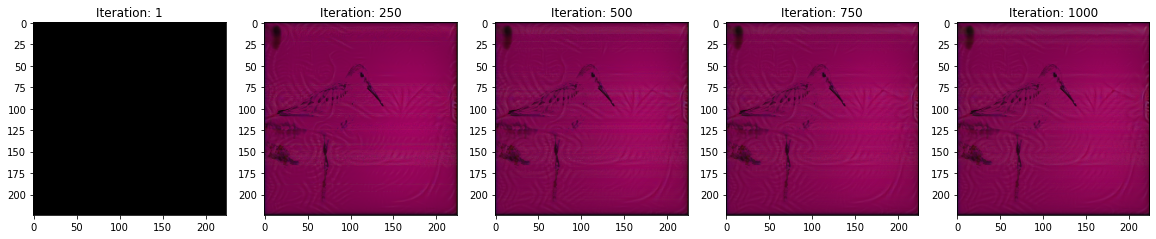

In [23]:
f, axarr = plt.subplots(1, len(results))
f.set_figheight(4)
f.set_figwidth(20)
for i, (iter, result) in enumerate(results.items()):
    axarr[i].title.set_text("Iteration: " + iter)
    # axarr[i].imshow(result.squeeze(axis=-1).squeeze(axis=0), cmap="gray", vmin=-0.5, vmax=0.5)
    axarr[i].imshow(result[0], cmap="gray", vmin=-0.5, vmax=0.5)

In [28]:
# input prediction
model.predict(inputs).argmax()

669

In [25]:
# PN prediction: should have changed
model.predict(results["1000"]).argmax()

669

# PP

In [1]:
loss_kwargs = {"mode": "PP", "c": 1, "gamma": 3, "K": 20, "AE": AE}
optimizer_kwargs = {"l1": 0.025, "l2": 0.000025, "eta": 1.0, "channels_first": False}
gradient_kwargs = {"mu": None}

NameError: name 'AE' is not defined

In [ ]:
    cem = maxi.ExplanationGenerator(
        loss=loss_class,
        optimizer=optimizer_class,
        gradient=gradient_class,
        num_iter=1000,
        loss_kwargs=loss_kwargs,
        optimizer_kwargs=optimizer_kwargs,
        gradient_kwargs=gradient_kwargs,
        save_freq=250,
        verbose=True,
    )

In [ ]:
results, _ = cem.run(image=inputs, inference_call=model)

In [ ]:
f, axarr = plt.subplots(1, len(results))
for i, (iter_, result) in enumerate(results.items()):
    axarr[i].title.set_text("Iteration: " + iter_)
    axarr[i].imshow(result.squeeze(axis=-1).squeeze(axis=0), cmap="gray", vmin=-0.5, vmax=0.5)